In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
# import some data to play with
diabetes = datasets.load_diabetes(as_frame=True)
df=pd.merge(pd.DataFrame(diabetes.data), pd.DataFrame(diabetes.target), left_index=True, right_index=True)
X = df.drop("target", axis=1)

K-means clustering

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=123)
fit = kmeans.fit(X)
print("Sum of squared distances for 2 clusters is", kmeans.inertia_)
# Sum of squared distances of samples to their closest cluster center, 
# weighted by the sample weights if provided.

Sum of squared distances for 2 clusters is 7.187000018583656


Hierarchical agglomerative clustering

In [15]:
# Import hierarchical clustering libraries
import scipy.cluster.hierarchy  as sch
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

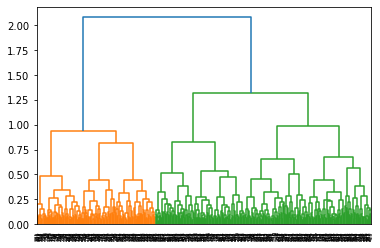

In [19]:
# Import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
# Create dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.show()
# Create clusters and fit
hc = AgglomerativeClustering(affinity = 'euclidean', linkage = 'ward')
hc.fit(X)

print(hc.n_clusters_)

#### ptimal number of clusters

Silhouette method

In [ ]:
from sklearn.metrics import silhouette_score
# For loop
for n_clusters in range(2,9):
    kmeans = KMeans(n_clusters=n_clusters)
    # Fit and predict your k-Means object
    preds = kmeans.fit_predict(X)
    score = silhouette_score(X, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

Elbow method

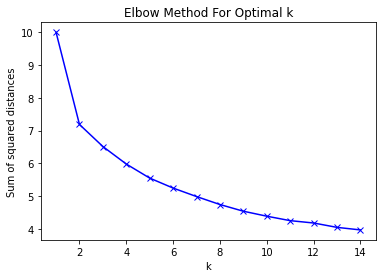

In [20]:
def elbow(X):
    '''Plot distribution of inertia with respect to number of k'''
    sum_of_squared_distances = []

    for k in range(1,15):
        kmeans = KMeans(n_clusters=k)
        kmeans = kmeans.fit(X)
        sum_of_squared_distances.append(kmeans.inertia_)

    plt.plot(range(1,15), sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum of squared distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

In [ ]:
elbow(X)